## CMPINF2100 Week_09 | Introduction to Regression: Assumptions of the Linear Model

### Import Modules

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

### Regression:

We will begin with the LINEAR MODEL. You commonly hear this described as LINEAR REGRESSION.

The goal of regression is to predict a CONTINUOUS OUTPUT **GIVEN** INPUTS.

For now, we will start simple with a SINGLE continuous input.

The Regression Model is BETWEEN the OUTPUT and the INPUT... "I typically describe the relationship DIFFERENTLY" - Professor

"I like to be SPECIFIC about where the MODDEL is actually applied!

The model does **NOT** predict the OUTPUT!

The model predicts the **AVERAGE** or **MEAN** output!"

The AVERAGE OUTPUT depends on the INPUT!

The math notation:

$$\mu = \beta_0 +\beta_1 \times x $$

### Visualize the Trend vs the Input

To do this, we need to CREATE our own data.

"I like to see the assumptions of the LINEAR MODEL by GENERATING our own data!"

Create a DataFrame that contains a SINGLE continuous input, `x`, between -3.5 and 3.5

In [3]:
df_viz = pd.DataFrame({'x':np.linspace(-3.5, 3.5, num=101)})

In [4]:
df_viz

,x
0,-3.50
1,-3.43
2,-3.36
3,-3.29
4,-3.22
...,...
96,3.22
97,3.29
98,3.36
99,3.43


To calculate the TREND or the AVERAGE OUTPUT we need to KNOW the coefficients, the INTERCEPT, and SLOPE of the model

In [51]:
my_intercept = 0.25
my_slope = -1.5

In [52]:
df_viz['trend'] = my_intercept + my_slope * df_viz.x

In [53]:
df_viz

,x,trend
0,-3.50,5.500
1,-3.43,5.395
2,-3.36,5.290
3,-3.29,5.185
4,-3.22,5.080
...,...,...
96,3.22,-4.580
97,3.29,-4.685
98,3.36,-4.790
99,3.43,-4.895


VISUALIZE the relationship in seaborn using a LINE CHART.

In [54]:
sns.set_style('whitegrid')

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


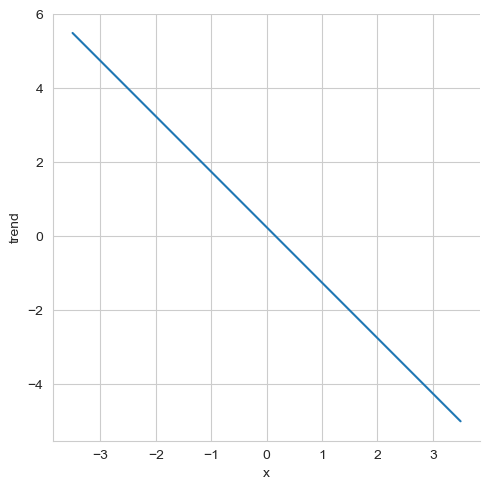

In [55]:
sns.relplot(data = df_viz, x='x', y='trend', kind='line')

plt.show()

In [56]:
df_viz

,x,trend
0,-3.50,5.500
1,-3.43,5.395
2,-3.36,5.290
3,-3.29,5.185
4,-3.22,5.080
...,...,...
96,3.22,-4.580
97,3.29,-4.685
98,3.36,-4.790
99,3.43,-4.895


### Randomness

The complete story of a linear model involves RANDOMNESS!

Up to this point, I have referred to the MODEL as BETWEEN the AVERAGE OUTPUT or TREND and the INPUT!

The OBSERVED OUTPUT is **RANDOMLY** and **NORMALLY** distributed around the AVERAGE OUTPUT!

The RANDOMNESS representss that there is a LIKLIHOOD between the OBSERVED OUTPUT and the TREND!

We will simulate random outputs around the TREND.

We therefore need to set the seed to ensure reproducability!

In [58]:
rg = np.random.default_rng(2100)

But let's use a smaller data set to help visualize randomness

This data set will have 9 unique values of the input between -3 and 3.

In [61]:
df = pd.DataFrame({'x': np.linspace(-3, 3, num=9)})

In [62]:
df

,x
0,-3.00
1,-2.25
2,-1.50
3,-0.75
4,0.00
5,0.75
6,1.50
7,2.25
8,3.00


Calculate the trend!

In [63]:
df['trend'] = my_intercept + my_slope * df.x

In [64]:
df

,x,trend
0,-3.00,4.750
1,-2.25,3.625
2,-1.50,2.500
3,-0.75,1.375
4,0.00,0.250
5,0.75,-0.875
6,1.50,-2.000
7,2.25,-3.125
8,3.00,-4.250


The randomness comes into play due to the OUTPUT around the TREND!

We must set the STANDARD DEVIATION in our Gaussian LIKELIHOOD

In [65]:
sigma_noise = 1.25

In [66]:
df['y'] = rg.normal( loc = df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0]) 

In [67]:
df

,x,trend,y
0,-3.00,4.750,6.030315
1,-2.25,3.625,1.457911
2,-1.50,2.500,2.388383
3,-0.75,1.375,0.007815
4,0.00,0.250,0.651244
5,0.75,-0.875,-2.254007
6,1.50,-2.000,-2.969992
7,2.25,-3.125,-3.537097
8,3.00,-4.250,-6.063282


Plot the random OUTPUT vs the INPUT via a scatter plot

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


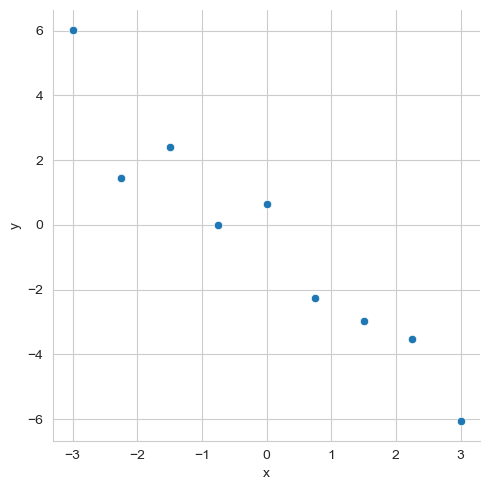

In [68]:
sns.relplot(data=df, x='x', y='y', kind='scatter')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


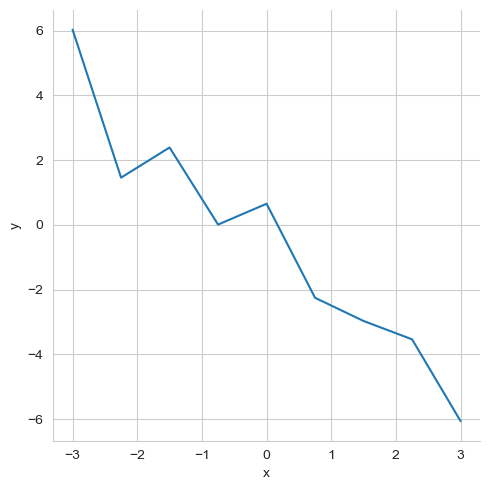

In [69]:
sns.relplot(data = df, x='x', y='y', kind='line')

plt.show()

Create a composite figure to show the observed random outputs around the TREND.

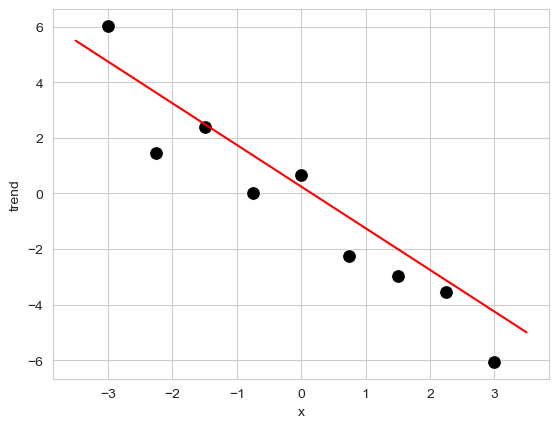

In [71]:
fig, ax = plt.subplots()

sns.lineplot(data = df_viz, x='x', y='trend', color='red', ax=ax)

sns.scatterplot(data = df, x='x', y='y', s=100, color='k', ax=ax)

plt.show()

What happens if we RANDOMLY generate MORE observations?

What if we **REPLICATE** calling the random number generator more times!

In [72]:
df_try = df.copy()

In [73]:
df_try

,x,trend,y
0,-3.00,4.750,6.030315
1,-2.25,3.625,1.457911
2,-1.50,2.500,2.388383
3,-0.75,1.375,0.007815
4,0.00,0.250,0.651244
5,0.75,-0.875,-2.254007
6,1.50,-2.000,-2.969992
7,2.25,-3.125,-3.537097
8,3.00,-4.250,-6.063282


Let's ADD 2 new columnss where we call the random numbeer generator 2 more times.

In [74]:
df_try['y1'] = rg.normal(loc=df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [75]:
df_try['y2'] = rg.normal(loc=df.trend.to_numpy(), scale=sigma_noise, size=df.shape[0])

In [76]:
df_try

,x,trend,y,y1,y2
0,-3.00,4.750,6.030315,6.086360,5.679270
1,-2.25,3.625,1.457911,3.371986,3.969865
2,-1.50,2.500,2.388383,0.892498,4.722336
3,-0.75,1.375,0.007815,1.134130,2.508582
4,0.00,0.250,0.651244,-1.273273,0.013304
5,0.75,-0.875,-2.254007,-0.667254,-0.392712
6,1.50,-2.000,-2.969992,-1.243836,-2.302036
7,2.25,-3.125,-3.537097,-0.847057,-2.839094
8,3.00,-4.250,-6.063282,-5.543591,-3.490245


Visualize the 3 sets of randomly generated outputs together!

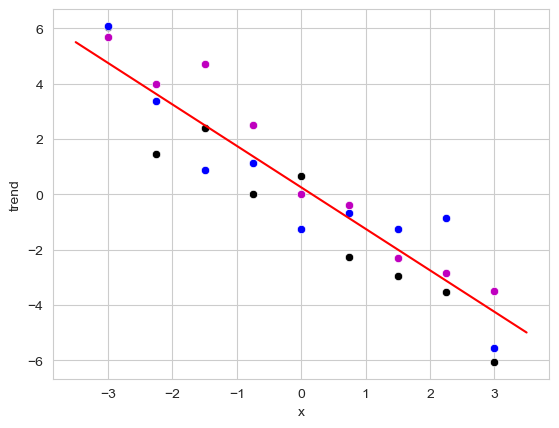

In [78]:
fig, ax = plt.subplots()

sns.lineplot(data = df_viz, x='x', y='trend', color='r', ax=ax)

sns.scatterplot(data = df_try, x='x', y='y', color='k', ax=ax)
sns.scatterplot(data = df_try, x='x', y='y1', color='b', ax=ax)
sns.scatterplot(data = df_try, x='x', y='y2', color='m', ax=ax)

plt.show()

What if we could REPLICATE this process of calling a random number generator over and over again?

Define a function which calculates the trend for a given set of INTERCEPT and SLOPE and GENERATES random outputs around the trend for a given standard deviation.

In [81]:
def generate_lm_y(rid, xuse, b0, b1, sigma_use):
    res_df = pd.DataFrame({'x': xuse})
    res_df['trend'] = b0 + b1 * res_df.x

    res_df['y'] = rg.normal(loc=res_df.trend.to_numpy(),
                            scale=sigma_use,
                            size=res_df.shape[0])

    res_df['rep_id'] = rid

    return res_df
    

In [82]:
generate_lm_y(0, df.x, my_intercept, my_slope, sigma_noise)

,x,trend,y,rep_id
0,-3.00,4.750,4.298194,0
1,-2.25,3.625,5.347201,0
2,-1.50,2.500,4.072299,0
3,-0.75,1.375,3.191032,0
4,0.00,0.250,-1.379291,0
5,0.75,-0.875,-0.534659,0
6,1.50,-2.000,-3.312908,0
7,2.25,-3.125,-3.921768,0
8,3.00,-4.250,-5.063279,0


Let's replicate 4 times!

In [87]:
study_4_list = []
for ix in range(4):
    study_4_list.append( generate_lm_y(ix, df.x,
                                       my_intercept, my_slope,
                                       sigma_noise) )
                                    
                                       

In [88]:
len ( study_4_list )

4

In [89]:
study_4_list[0]

,x,trend,y,rep_id
0,-3.00,4.750,5.141063,0
1,-2.25,3.625,2.915319,0
2,-1.50,2.500,1.132301,0
3,-0.75,1.375,2.224567,0
4,0.00,0.250,0.789303,0
5,0.75,-0.875,1.318978,0
6,1.50,-2.000,-2.719782,0
7,2.25,-3.125,-3.089010,0
8,3.00,-4.250,-3.756243,0


In [90]:
study_4_list[1]

,x,trend,y,rep_id
0,-3.00,4.750,5.167516,1
1,-2.25,3.625,3.392198,1
2,-1.50,2.500,3.747939,1
3,-0.75,1.375,1.112218,1
4,0.00,0.250,-1.348010,1
5,0.75,-0.875,1.206522,1
6,1.50,-2.000,-0.507476,1
7,2.25,-3.125,-2.660071,1
8,3.00,-4.250,-2.323694,1


Vertically STACK or COMBINE the DataFramess in the list!

In [91]:
study_4_df = pd.concat( study_4_list, ignore_index = True )

In [92]:
study_4_df.head()

,x,trend,y,rep_id
0,-3.00,4.750,5.141063,0
1,-2.25,3.625,2.915319,0
2,-1.50,2.500,1.132301,0
3,-0.75,1.375,2.224567,0
4,0.00,0.250,0.789303,0


In [93]:
study_4_df.tail()

,x,trend,y,rep_id
31,0.00,0.250,-0.770692,3
32,0.75,-0.875,-1.289980,3
33,1.50,-2.000,-3.239531,3
34,2.25,-3.125,-5.101369,3
35,3.00,-4.250,-3.723242,3


Visualize the 4 random replications!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


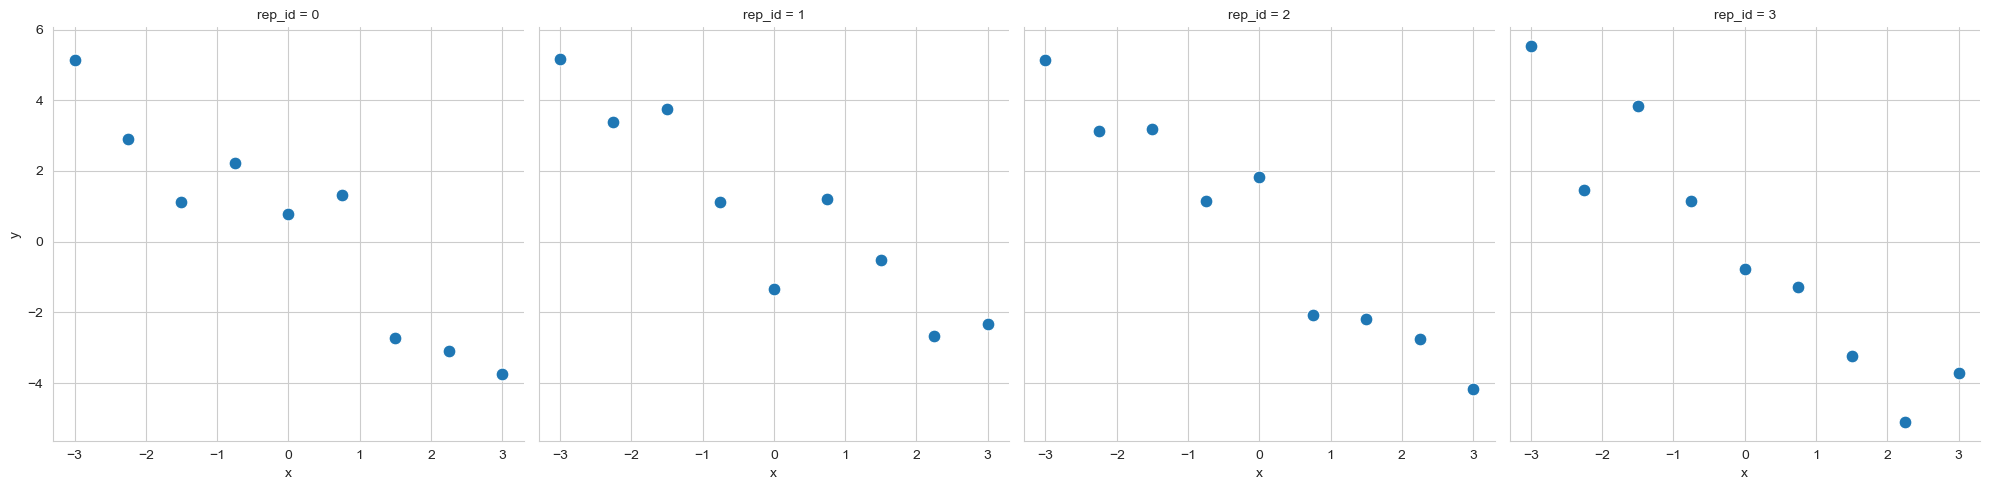

In [95]:
sns.relplot(data = study_4_df, x='x', y='y', col='rep_id', s=85)

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


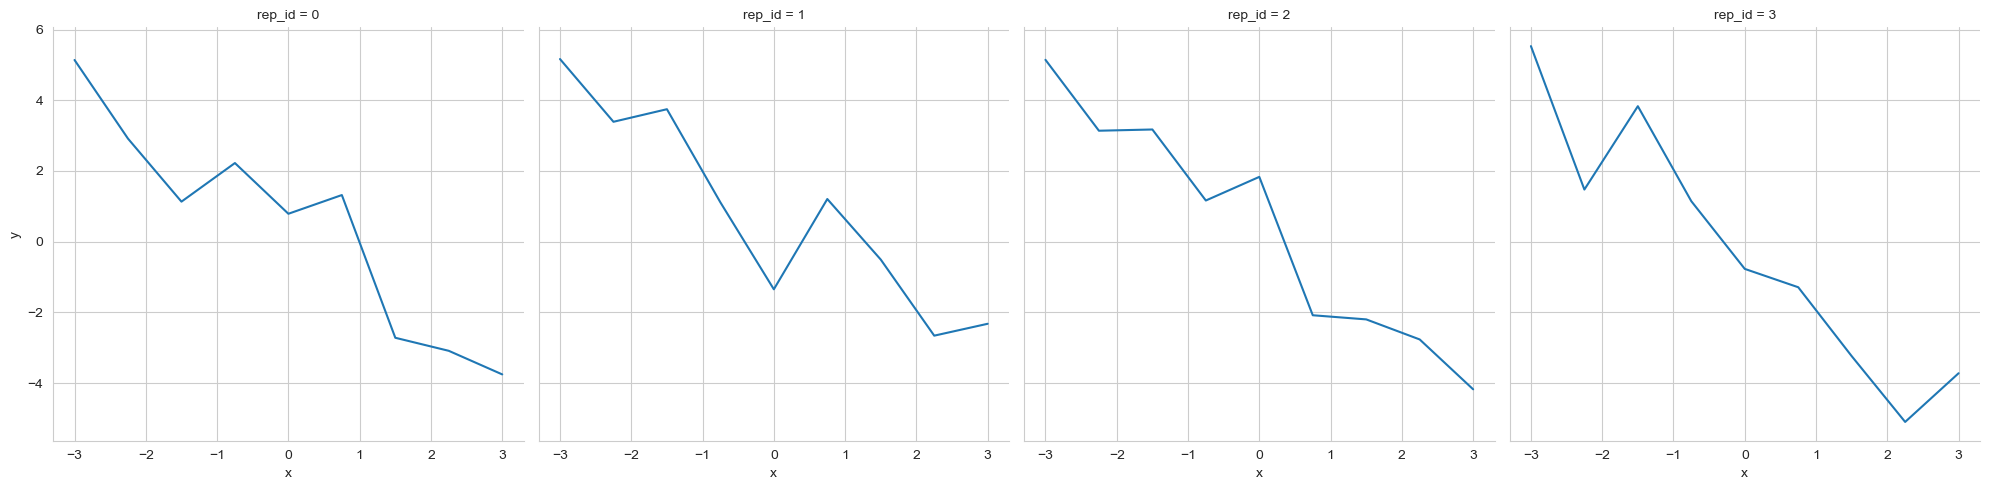

In [96]:
sns.relplot(data = study_4_df, x='x', y='y', col='rep_id', kind='line')

plt.show()

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


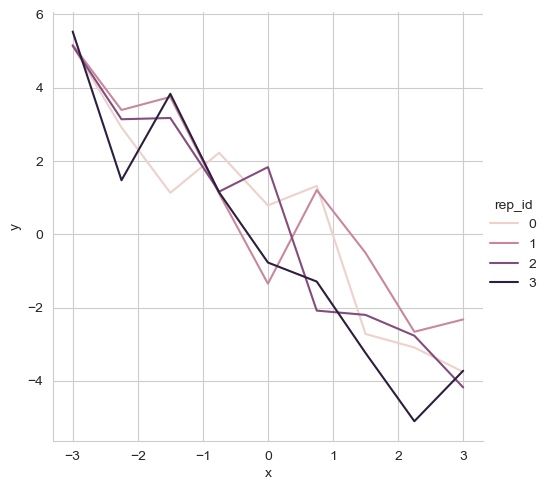

In [98]:
sns.relplot( data=study_4_df, x='x', y='y', hue='rep_id', kind='line')

plt.show()

But... what we really care about is the **AVERAGE** output!

How is teh **AVERAGE** changing as the INPUT changes?

Let's calculate the AVERAGE output for each unique value of the input!

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


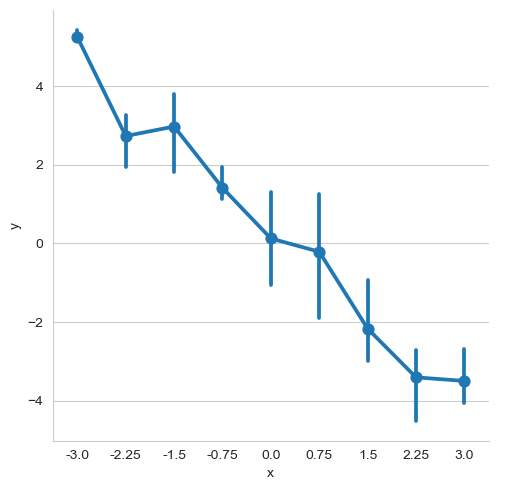

In [99]:
sns.catplot(data = study_4_df, x='x', y='y', kind='point')

plt.show()

We could create this kind of figure with the `sns.lmplot()`.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


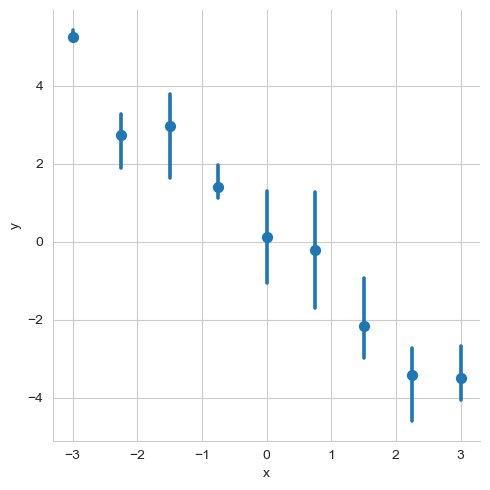

In [101]:
sns.lmplot(data=study_4_df, x='x', y='y', fit_reg=False, x_estimator=np.mean)

plt.show()

What if we used 20 replications insstead of 4?

In [102]:
study_20_list = []
for ix in range(20):
    study_20_list.append( generate_lm_y(ix, df.x,
                                        my_intercept, my_slope,
                                        sigma_noise))

In [103]:
len(study_20_list)

20

In [104]:
study_20_df = pd.concat( study_20_list, ignore_index=True )

In [105]:
study_20_df

,x,trend,y,rep_id
0,-3.00,4.750,2.086895,0
1,-2.25,3.625,3.155870,0
2,-1.50,2.500,3.690211,0
3,-0.75,1.375,0.360756,0
4,0.00,0.250,1.846279,0
...,...,...,...,...
175,0.00,0.250,-0.220095,19
176,0.75,-0.875,1.308138,19
177,1.50,-2.000,-2.367862,19
178,2.25,-3.125,-2.131189,19


C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


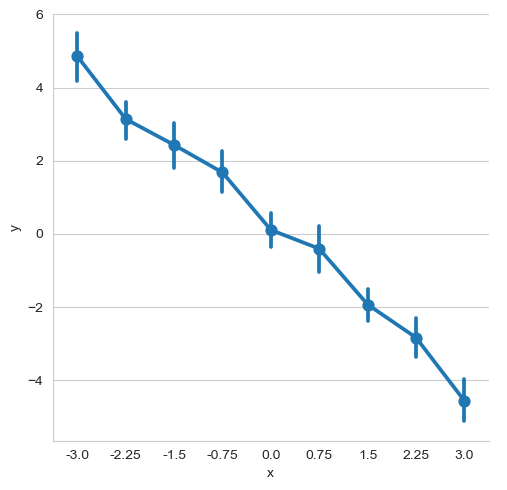

In [106]:
sns.catplot( data=study_20_df, x='x', y='y', kind='point')

plt.show()

Replicate but with 500 times rather than 4 replications!

In [107]:
study_500_list = []
for ix in range(500):
    study_500_list.append( generate_lm_y(ix, df.x,
                                         my_intercept, my_slope,
                                         sigma_noise))

In [108]:
study_500_df = pd.concat( study_500_list, ignore_index=True)

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


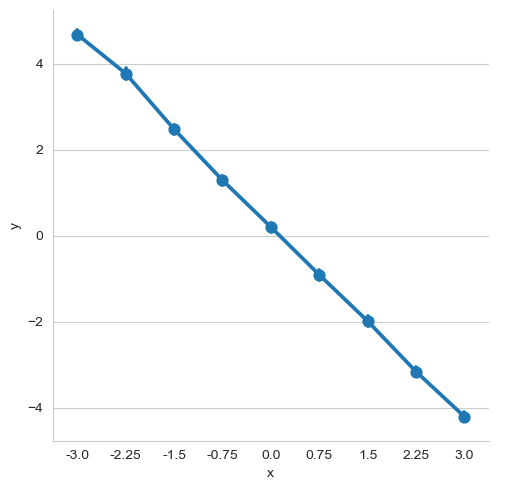

In [109]:
sns.catplot(data = study_500_df, x='x', y='y', kind='point')

plt.show()

I will plot the OBSERVATIONS from the 500 replications on top of the TRUE TREND and the SAMPLE AVERATE at each input location.

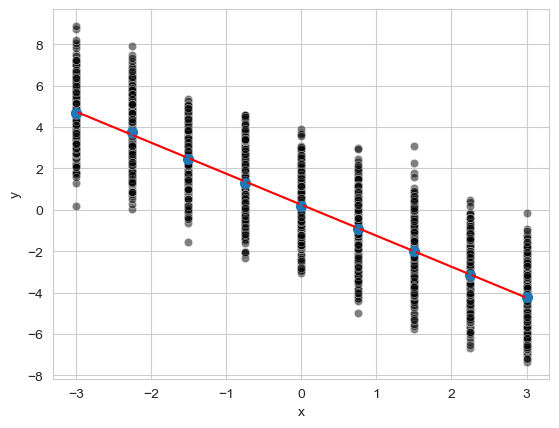

In [111]:
fig, ax = plt.subplots()

sns.scatterplot(data = study_500_df, x='x', y='y', alpha=0.5, color='k', ax=ax)

sns.lineplot(data = study_500_df, x='x', y='trend', color='r', ax=ax)

sns.regplot(data = study_500_df, x='x', y='y', fit_reg=False, x_estimator=np.mean, ax=ax)

plt.show()

Let's look at the VARIATION around the TRUE TREND in more detail via BOXPLOTS.

C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


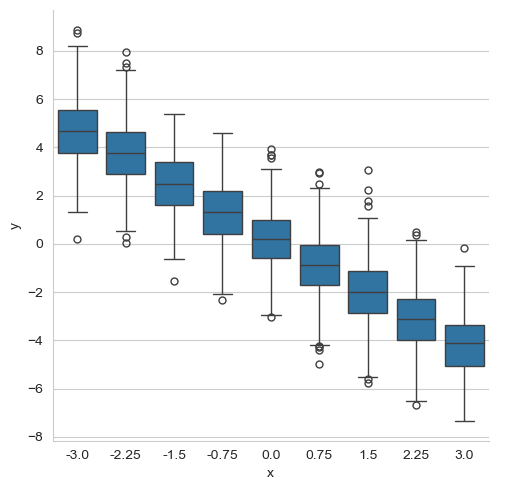

In [112]:
sns.catplot(data = study_500_df, x='x', y='y', kind='box')

plt.show()

Boxplots do not show the distributional SHAPE of the data.

Let's look at the distributional shape of 500 replications at each input location using VIOLINS.

C:\Users\Canye\AppData\Local\Temp\ipykernel_47412\4253622311.py:1: FutureWarning: 

The `bw` parameter is deprecated in favor of `bw_method`/`bw_adjust`.
Setting `bw_method=1`, but please see docs for the new parameters
and update your code. This will become an error in seaborn v0.15.0.

  sns.catplot(data = study_500_df, x='x', y='y', kind='violin', aspect=2, bw=1)
C:\Users\Canye\anaconda3\envs\cmpinf2100\lib\site-packages\seaborn\axisgrid.py:123: UserWarning: The figure layout has changed to tight
  self._figure.tight_layout(*args, **kwargs)


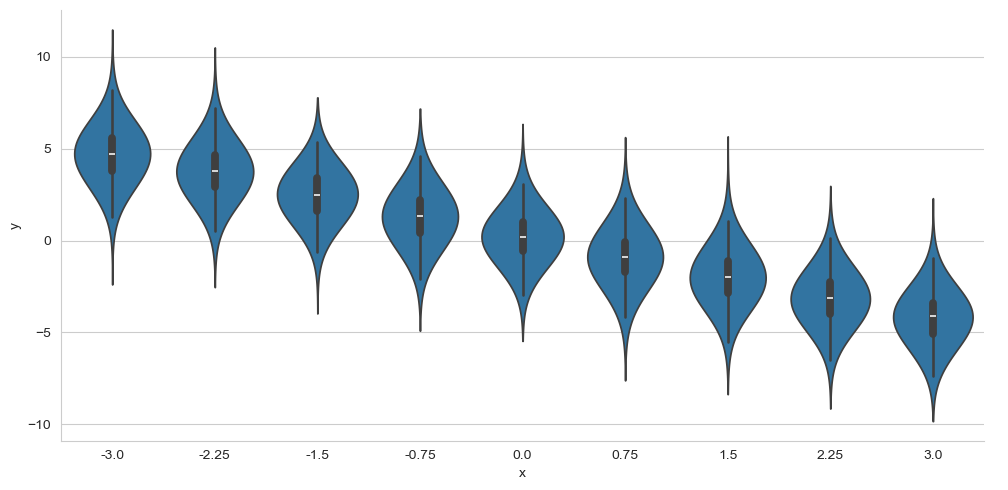

In [114]:
sns.catplot(data = study_500_df, x='x', y='y', kind='violin', aspect=2, bw=1)

plt.show()

### Why did we do this?

This simple SIMULATION example reveals NEARLY all of the assumptions of the LINEAR MODEL for regression!

We have learned that the AVERAGE OUTPUT depends on the input!

Changing the INPUT CHANGES the AVERAGE OUTPUT (TREND)!

The VARIATION around the TREND is **CONSTANT** and does NOT change as the INPUT changes!

The OUTPUT is **NORMALLY** distributed around the AVERAGE OUTPUT!